Heart Disease Data Set

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Attribute Information:

age
sex (1 = male; 0 = female)
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target (0,1,2,3,4)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline

In [2]:
# Lets read the datat and provide columns name. In original dataset we don not have column names
col_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'bs', 'restecg', 
          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
hd = pd.read_csv('Heartdisease.csv',names=col_names, header=None )

In [3]:
hd.head(4)

,age,sex,cp,trestbps,chol,bs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0


In [4]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
bs          0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Ultimately this probelem is about heart disease exist or not based on other features values provided in the dataset. Lets convert into binary classification problem.

In [5]:
hd['target'] = hd.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
hd['thal'] = hd.thal.fillna(hd.thal.mean())
hd['ca'] = hd.ca.fillna(hd.ca.mean())

In [6]:
hd.head()

,age,sex,cp,trestbps,chol,bs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
bs          0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

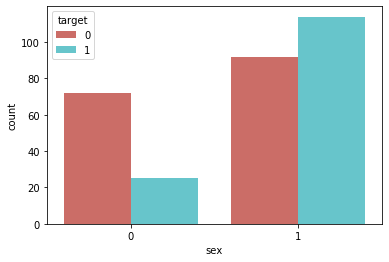

In [8]:
# Count plot to see sex distribution in each target class
sns.countplot(x='sex', data=hd, palette='hls', hue='target')
plt.show()

In [9]:
# Data Preprocessing (Split data into features and target class)
x=hd.iloc[:,2:13]
y=hd.iloc[:,-1]

In [10]:
# Standardize the feature_space values 
# Import Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
sc = StandardScaler()
feature_data_std = sc.fit_transform(x)
print(feature_data_std.shape)

(303, 11)


In [11]:
# Reshape the target variable 
target_class=hd['target'].values.reshape(-1,1)
print(target_class.shape)

(303, 1)


In [12]:
# Lets import relevent libraires to trian the model.
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [13]:
# Perform train and test split
x_train, x_test, y_train, y_test = train_test_split(feature_data_std,target_class, test_size= 0.25, random_state=42)

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp=mlp.fit(x_train, y_train)

Iteration 1, loss = 0.71805085
Iteration 2, loss = 0.71741070
Iteration 3, loss = 0.71640986
Iteration 4, loss = 0.71509876
Iteration 5, loss = 0.71354184
Iteration 6, loss = 0.71177506
Iteration 7, loss = 0.70986116
Iteration 8, loss = 0.70778824
Iteration 9, loss = 0.70568498
Iteration 10, loss = 0.70353680
Iteration 11, loss = 0.70138002
Iteration 12, loss = 0.69923399
Iteration 13, loss = 0.69706668
Iteration 14, loss = 0.69487119
Iteration 15, loss = 0.69269171
Iteration 16, loss = 0.69047873
Iteration 17, loss = 0.68831006
Iteration 18, loss = 0.68613513
Iteration 19, loss = 0.68397004
Iteration 20, loss = 0.68179559
Iteration 21, loss = 0.67965567
Iteration 22, loss = 0.67750731
Iteration 23, loss = 0.67537031
Iteration 24, loss = 0.67321164
Iteration 25, loss = 0.67109824
Iteration 26, loss = 0.66891638
Iteration 27, loss = 0.66683316
Iteration 28, loss = 0.66469051
Iteration 29, loss = 0.66257726
Iteration 30, loss = 0.66048807
Iteration 31, loss = 0.65846903
Iteration 32, los

Iteration 284, loss = 0.35226364
Iteration 285, loss = 0.35192566
Iteration 286, loss = 0.35158100
Iteration 287, loss = 0.35123922
Iteration 288, loss = 0.35089066
Iteration 289, loss = 0.35055080
Iteration 290, loss = 0.35023945
Iteration 291, loss = 0.34995572
Iteration 292, loss = 0.34958071
Iteration 293, loss = 0.34927374
Iteration 294, loss = 0.34891243
Iteration 295, loss = 0.34857875
Iteration 296, loss = 0.34822877
Iteration 297, loss = 0.34791870
Iteration 298, loss = 0.34757201
Iteration 299, loss = 0.34726170
Iteration 300, loss = 0.34698203
Iteration 301, loss = 0.34673614
Iteration 302, loss = 0.34643360
Iteration 303, loss = 0.34611231
Iteration 304, loss = 0.34579441
Iteration 305, loss = 0.34551351
Iteration 306, loss = 0.34512575
Iteration 307, loss = 0.34478635
Iteration 308, loss = 0.34445766
Iteration 309, loss = 0.34410765
Iteration 310, loss = 0.34376001
Iteration 311, loss = 0.34342087
Iteration 312, loss = 0.34313768
Iteration 313, loss = 0.34277959
Iteration 

In [15]:
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(mlp, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_mlp = mlp.predict(x_test)
print("Accuracy Score of the MLP classifier: ", accuracy_score(y_test, y_pred_mlp))

Iteration 1, loss = 0.72054769
Iteration 2, loss = 0.71987507
Iteration 3, loss = 0.71906665
Iteration 4, loss = 0.71795755
Iteration 5, loss = 0.71660402
Iteration 6, loss = 0.71502996
Iteration 7, loss = 0.71335529
Iteration 8, loss = 0.71149498
Iteration 9, loss = 0.70955923
Iteration 10, loss = 0.70765423
Iteration 11, loss = 0.70576997
Iteration 12, loss = 0.70380060
Iteration 13, loss = 0.70177610
Iteration 14, loss = 0.69979521
Iteration 15, loss = 0.69776059
Iteration 16, loss = 0.69561109
Iteration 17, loss = 0.69341117
Iteration 18, loss = 0.69149310
Iteration 19, loss = 0.68965285
Iteration 20, loss = 0.68790251
Iteration 21, loss = 0.68619263
Iteration 22, loss = 0.68464806
Iteration 23, loss = 0.68288729
Iteration 24, loss = 0.68102423
Iteration 25, loss = 0.67897952
Iteration 26, loss = 0.67711626
Iteration 27, loss = 0.67516944
Iteration 28, loss = 0.67336731
Iteration 29, loss = 0.67151684
Iteration 30, loss = 0.66953458
Iteration 31, loss = 0.66732126
Iteration 32, los

Iteration 268, loss = 0.35387137
Iteration 269, loss = 0.35333909
Iteration 270, loss = 0.35291301
Iteration 271, loss = 0.35251962
Iteration 272, loss = 0.35229631
Iteration 273, loss = 0.35200788
Iteration 274, loss = 0.35165401
Iteration 275, loss = 0.35171317
Iteration 276, loss = 0.35177614
Iteration 277, loss = 0.35156333
Iteration 278, loss = 0.35131384
Iteration 279, loss = 0.35115162
Iteration 280, loss = 0.35083024
Iteration 281, loss = 0.35031255
Iteration 282, loss = 0.34933616
Iteration 283, loss = 0.34829373
Iteration 284, loss = 0.34749307
Iteration 285, loss = 0.34682413
Iteration 286, loss = 0.34620540
Iteration 287, loss = 0.34565404
Iteration 288, loss = 0.34510472
Iteration 289, loss = 0.34468878
Iteration 290, loss = 0.34422757
Iteration 291, loss = 0.34385535
Iteration 292, loss = 0.34344221
Iteration 293, loss = 0.34308611
Iteration 294, loss = 0.34270060
Iteration 295, loss = 0.34228558
Iteration 296, loss = 0.34189979
Iteration 297, loss = 0.34155806
Iteration 

Iteration 121, loss = 0.50536911
Iteration 122, loss = 0.50354228
Iteration 123, loss = 0.50180396
Iteration 124, loss = 0.49969696
Iteration 125, loss = 0.49769007
Iteration 126, loss = 0.49561950
Iteration 127, loss = 0.49349493
Iteration 128, loss = 0.49107256
Iteration 129, loss = 0.48876265
Iteration 130, loss = 0.48646009
Iteration 131, loss = 0.48422132
Iteration 132, loss = 0.48228346
Iteration 133, loss = 0.48032629
Iteration 134, loss = 0.47863153
Iteration 135, loss = 0.47700751
Iteration 136, loss = 0.47534569
Iteration 137, loss = 0.47380260
Iteration 138, loss = 0.47251622
Iteration 139, loss = 0.47097601
Iteration 140, loss = 0.46928628
Iteration 141, loss = 0.46763727
Iteration 142, loss = 0.46589165
Iteration 143, loss = 0.46432753
Iteration 144, loss = 0.46281300
Iteration 145, loss = 0.46119706
Iteration 146, loss = 0.45958929
Iteration 147, loss = 0.45809948
Iteration 148, loss = 0.45691458
Iteration 149, loss = 0.45596214
Iteration 150, loss = 0.45480151
Iteration 

Iteration 397, loss = 0.31880207
Iteration 398, loss = 0.31823144
Iteration 399, loss = 0.31773016
Iteration 400, loss = 0.31734539
Iteration 401, loss = 0.31724564
Iteration 402, loss = 0.31715894
Iteration 403, loss = 0.31729438
Iteration 404, loss = 0.31732050
Iteration 405, loss = 0.31739572
Iteration 406, loss = 0.31765249
Iteration 407, loss = 0.31778604
Iteration 408, loss = 0.31793108
Iteration 409, loss = 0.31845725
Iteration 410, loss = 0.31856642
Iteration 411, loss = 0.31853287
Iteration 412, loss = 0.31888554
Iteration 413, loss = 0.31940572
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71998787
Iteration 2, loss = 0.71944067
Iteration 3, loss = 0.71875250
Iteration 4, loss = 0.71779959
Iteration 5, loss = 0.71664850
Iteration 6, loss = 0.71527644
Iteration 7, loss = 0.71377973
Iteration 8, loss = 0.71208300
Iteration 9, loss = 0.71021467
Iteration 10, loss = 0.70825321
Iteration 11, loss = 0.70644295
Iterat

Iteration 248, loss = 0.36584945
Iteration 249, loss = 0.36540547
Iteration 250, loss = 0.36488337
Iteration 251, loss = 0.36440558
Iteration 252, loss = 0.36385250
Iteration 253, loss = 0.36344703
Iteration 254, loss = 0.36301210
Iteration 255, loss = 0.36266010
Iteration 256, loss = 0.36229418
Iteration 257, loss = 0.36178047
Iteration 258, loss = 0.36121764
Iteration 259, loss = 0.36062454
Iteration 260, loss = 0.36012546
Iteration 261, loss = 0.35961835
Iteration 262, loss = 0.35914341
Iteration 263, loss = 0.35870466
Iteration 264, loss = 0.35824607
Iteration 265, loss = 0.35790221
Iteration 266, loss = 0.35751971
Iteration 267, loss = 0.35711658
Iteration 268, loss = 0.35669584
Iteration 269, loss = 0.35625979
Iteration 270, loss = 0.35594483
Iteration 271, loss = 0.35566679
Iteration 272, loss = 0.35559104
Iteration 273, loss = 0.35542694
Iteration 274, loss = 0.35514152
Iteration 275, loss = 0.35509684
Iteration 276, loss = 0.35484936
Iteration 277, loss = 0.35454582
Iteration 

Iteration 100, loss = 0.51456256
Iteration 101, loss = 0.51265449
Iteration 102, loss = 0.51067808
Iteration 103, loss = 0.50871920
Iteration 104, loss = 0.50682177
Iteration 105, loss = 0.50481474
Iteration 106, loss = 0.50299654
Iteration 107, loss = 0.50133313
Iteration 108, loss = 0.49963506
Iteration 109, loss = 0.49825119
Iteration 110, loss = 0.49700194
Iteration 111, loss = 0.49583676
Iteration 112, loss = 0.49458739
Iteration 113, loss = 0.49317842
Iteration 114, loss = 0.49197347
Iteration 115, loss = 0.49052699
Iteration 116, loss = 0.48897332
Iteration 117, loss = 0.48750177
Iteration 118, loss = 0.48596221
Iteration 119, loss = 0.48442935
Iteration 120, loss = 0.48281036
Iteration 121, loss = 0.48116215
Iteration 122, loss = 0.47943972
Iteration 123, loss = 0.47775946
Iteration 124, loss = 0.47596584
Iteration 125, loss = 0.47415091
Iteration 126, loss = 0.47242638
Iteration 127, loss = 0.47058923
Iteration 128, loss = 0.46868847
Iteration 129, loss = 0.46698130
Iteration 

Iteration 357, loss = 0.32890482
Iteration 358, loss = 0.32870298
Iteration 359, loss = 0.32851274
Iteration 360, loss = 0.32841100
Iteration 361, loss = 0.32841462
Iteration 362, loss = 0.32840834
Iteration 363, loss = 0.32836501
Iteration 364, loss = 0.32801472
Iteration 365, loss = 0.32777112
Iteration 366, loss = 0.32757517
Iteration 367, loss = 0.32742691
Iteration 368, loss = 0.32723535
Iteration 369, loss = 0.32702784
Iteration 370, loss = 0.32678942
Iteration 371, loss = 0.32674980
Iteration 372, loss = 0.32632077
Iteration 373, loss = 0.32587664
Iteration 374, loss = 0.32557822
Iteration 375, loss = 0.32521428
Iteration 376, loss = 0.32511915
Iteration 377, loss = 0.32554844
Iteration 378, loss = 0.32532586
Iteration 379, loss = 0.32459620
Iteration 380, loss = 0.32398052
Iteration 381, loss = 0.32319303
Iteration 382, loss = 0.32246208
Iteration 383, loss = 0.32188197
Iteration 384, loss = 0.32145161
Iteration 385, loss = 0.32112831
Iteration 386, loss = 0.32088322
Iteration 

Iteration 204, loss = 0.39449353
Iteration 205, loss = 0.39388730
Iteration 206, loss = 0.39332964
Iteration 207, loss = 0.39280183
Iteration 208, loss = 0.39224096
Iteration 209, loss = 0.39166386
Iteration 210, loss = 0.39133007
Iteration 211, loss = 0.39089450
Iteration 212, loss = 0.39037458
Iteration 213, loss = 0.38980477
Iteration 214, loss = 0.38920942
Iteration 215, loss = 0.38857827
Iteration 216, loss = 0.38795228
Iteration 217, loss = 0.38720521
Iteration 218, loss = 0.38643928
Iteration 219, loss = 0.38564994
Iteration 220, loss = 0.38491497
Iteration 221, loss = 0.38410431
Iteration 222, loss = 0.38335795
Iteration 223, loss = 0.38270576
Iteration 224, loss = 0.38238881
Iteration 225, loss = 0.38186750
Iteration 226, loss = 0.38154790
Iteration 227, loss = 0.38122426
Iteration 228, loss = 0.38103433
Iteration 229, loss = 0.38063029
Iteration 230, loss = 0.38073302
Iteration 231, loss = 0.38100553
Iteration 232, loss = 0.38076064
Iteration 233, loss = 0.38062806
Iteration 

Iteration 56, loss = 0.59151989
Iteration 57, loss = 0.58913437
Iteration 58, loss = 0.58661664
Iteration 59, loss = 0.58431926
Iteration 60, loss = 0.58205045
Iteration 61, loss = 0.57986082
Iteration 62, loss = 0.57766731
Iteration 63, loss = 0.57548827
Iteration 64, loss = 0.57321985
Iteration 65, loss = 0.57075721
Iteration 66, loss = 0.56833720
Iteration 67, loss = 0.56597578
Iteration 68, loss = 0.56388177
Iteration 69, loss = 0.56148005
Iteration 70, loss = 0.55913966
Iteration 71, loss = 0.55667701
Iteration 72, loss = 0.55423459
Iteration 73, loss = 0.55167560
Iteration 74, loss = 0.54908503
Iteration 75, loss = 0.54660094
Iteration 76, loss = 0.54435406
Iteration 77, loss = 0.54236225
Iteration 78, loss = 0.54036088
Iteration 79, loss = 0.53814331
Iteration 80, loss = 0.53583253
Iteration 81, loss = 0.53340542
Iteration 82, loss = 0.53105042
Iteration 83, loss = 0.52863876
Iteration 84, loss = 0.52620022
Iteration 85, loss = 0.52391652
Iteration 86, loss = 0.52176866
Iteratio

Iteration 323, loss = 0.31062927
Iteration 324, loss = 0.31022030
Iteration 325, loss = 0.30993132
Iteration 326, loss = 0.30965818
Iteration 327, loss = 0.30937907
Iteration 328, loss = 0.30930738
Iteration 329, loss = 0.30893998
Iteration 330, loss = 0.30873375
Iteration 331, loss = 0.30860566
Iteration 332, loss = 0.30866896
Iteration 333, loss = 0.30834317
Iteration 334, loss = 0.30795534
Iteration 335, loss = 0.30744145
Iteration 336, loss = 0.30690168
Iteration 337, loss = 0.30651677
Iteration 338, loss = 0.30614954
Iteration 339, loss = 0.30593206
Iteration 340, loss = 0.30580295
Iteration 341, loss = 0.30554826
Iteration 342, loss = 0.30532032
Iteration 343, loss = 0.30495160
Iteration 344, loss = 0.30463832
Iteration 345, loss = 0.30440025
Iteration 346, loss = 0.30414211
Iteration 347, loss = 0.30386157
Iteration 348, loss = 0.30353892
Iteration 349, loss = 0.30322532
Iteration 350, loss = 0.30288970
Iteration 351, loss = 0.30259443
Iteration 352, loss = 0.30233975
Iteration 

Iteration 178, loss = 0.41680631
Iteration 179, loss = 0.41612080
Iteration 180, loss = 0.41590447
Iteration 181, loss = 0.41530380
Iteration 182, loss = 0.41449386
Iteration 183, loss = 0.41388402
Iteration 184, loss = 0.41317685
Iteration 185, loss = 0.41225260
Iteration 186, loss = 0.41114967
Iteration 187, loss = 0.40979590
Iteration 188, loss = 0.40847474
Iteration 189, loss = 0.40721545
Iteration 190, loss = 0.40608719
Iteration 191, loss = 0.40525688
Iteration 192, loss = 0.40454614
Iteration 193, loss = 0.40381963
Iteration 194, loss = 0.40290641
Iteration 195, loss = 0.40204434
Iteration 196, loss = 0.40115322
Iteration 197, loss = 0.40030639
Iteration 198, loss = 0.39945227
Iteration 199, loss = 0.39856248
Iteration 200, loss = 0.39774385
Iteration 201, loss = 0.39705573
Iteration 202, loss = 0.39655908
Iteration 203, loss = 0.39599359
Iteration 204, loss = 0.39528164
Iteration 205, loss = 0.39469137
Iteration 206, loss = 0.39409793
Iteration 207, loss = 0.39357184
Iteration 

Iteration 30, loss = 0.65548777
Iteration 31, loss = 0.65342520
Iteration 32, loss = 0.65140777
Iteration 33, loss = 0.64934063
Iteration 34, loss = 0.64726714
Iteration 35, loss = 0.64512369
Iteration 36, loss = 0.64294051
Iteration 37, loss = 0.64066058
Iteration 38, loss = 0.63832243
Iteration 39, loss = 0.63601089
Iteration 40, loss = 0.63371323
Iteration 41, loss = 0.63150609
Iteration 42, loss = 0.62934996
Iteration 43, loss = 0.62728907
Iteration 44, loss = 0.62519517
Iteration 45, loss = 0.62310449
Iteration 46, loss = 0.62111189
Iteration 47, loss = 0.61891932
Iteration 48, loss = 0.61673729
Iteration 49, loss = 0.61467318
Iteration 50, loss = 0.61257674
Iteration 51, loss = 0.61037135
Iteration 52, loss = 0.60811676
Iteration 53, loss = 0.60602500
Iteration 54, loss = 0.60381075
Iteration 55, loss = 0.60158207
Iteration 56, loss = 0.59940441
Iteration 57, loss = 0.59716517
Iteration 58, loss = 0.59496106
Iteration 59, loss = 0.59274079
Iteration 60, loss = 0.59046519
Iteratio

Iteration 301, loss = 0.32314082
Iteration 302, loss = 0.32271469
Iteration 303, loss = 0.32222402
Iteration 304, loss = 0.32186716
Iteration 305, loss = 0.32144599
Iteration 306, loss = 0.32099305
Iteration 307, loss = 0.32057962
Iteration 308, loss = 0.32013712
Iteration 309, loss = 0.31968118
Iteration 310, loss = 0.31926436
Iteration 311, loss = 0.31890330
Iteration 312, loss = 0.31861420
Iteration 313, loss = 0.31825476
Iteration 314, loss = 0.31790162
Iteration 315, loss = 0.31758862
Iteration 316, loss = 0.31733096
Iteration 317, loss = 0.31706347
Iteration 318, loss = 0.31681341
Iteration 319, loss = 0.31678258
Iteration 320, loss = 0.31657116
Iteration 321, loss = 0.31654466
Iteration 322, loss = 0.31659692
Iteration 323, loss = 0.31693193
Iteration 324, loss = 0.31743206
Iteration 325, loss = 0.31753498
Iteration 326, loss = 0.31742605
Iteration 327, loss = 0.31709242
Iteration 328, loss = 0.31623455
Iteration 329, loss = 0.31530827
Iteration 330, loss = 0.31467318
Iteration 

Iteration 68, loss = 0.57698764
Iteration 69, loss = 0.57483406
Iteration 70, loss = 0.57256214
Iteration 71, loss = 0.57028002
Iteration 72, loss = 0.56804632
Iteration 73, loss = 0.56583606
Iteration 74, loss = 0.56363440
Iteration 75, loss = 0.56173825
Iteration 76, loss = 0.55974326
Iteration 77, loss = 0.55772497
Iteration 78, loss = 0.55582140
Iteration 79, loss = 0.55403054
Iteration 80, loss = 0.55203436
Iteration 81, loss = 0.55012667
Iteration 82, loss = 0.54814019
Iteration 83, loss = 0.54605465
Iteration 84, loss = 0.54398749
Iteration 85, loss = 0.54209538
Iteration 86, loss = 0.54011396
Iteration 87, loss = 0.53811375
Iteration 88, loss = 0.53616634
Iteration 89, loss = 0.53415577
Iteration 90, loss = 0.53226610
Iteration 91, loss = 0.53041540
Iteration 92, loss = 0.52849975
Iteration 93, loss = 0.52690044
Iteration 94, loss = 0.52498860
Iteration 95, loss = 0.52300171
Iteration 96, loss = 0.52094299
Iteration 97, loss = 0.51910774
Iteration 98, loss = 0.51700576
Iteratio

Iteration 336, loss = 0.33267733
Iteration 337, loss = 0.33243412
Iteration 338, loss = 0.33227198
Iteration 339, loss = 0.33191356
Iteration 340, loss = 0.33156680
Iteration 341, loss = 0.33122269
Iteration 342, loss = 0.33097624
Iteration 343, loss = 0.33082162
Iteration 344, loss = 0.33070467
Iteration 345, loss = 0.33058891
Iteration 346, loss = 0.33029068
Iteration 347, loss = 0.33011211
Iteration 348, loss = 0.32980187
Iteration 349, loss = 0.32969039
Iteration 350, loss = 0.32935395
Iteration 351, loss = 0.32897877
Iteration 352, loss = 0.32831714
Iteration 353, loss = 0.32779706
Iteration 354, loss = 0.32738269
Iteration 355, loss = 0.32696383
Iteration 356, loss = 0.32636743
Iteration 357, loss = 0.32587748
Iteration 358, loss = 0.32542416
Iteration 359, loss = 0.32502092
Iteration 360, loss = 0.32483379
Iteration 361, loss = 0.32483395
Iteration 362, loss = 0.32460980
Iteration 363, loss = 0.32433324
Iteration 364, loss = 0.32419966
Iteration 365, loss = 0.32386092
Iteration 

Iteration 105, loss = 0.50356938
Iteration 106, loss = 0.50170713
Iteration 107, loss = 0.49985704
Iteration 108, loss = 0.49795790
Iteration 109, loss = 0.49627692
Iteration 110, loss = 0.49469277
Iteration 111, loss = 0.49310176
Iteration 112, loss = 0.49162660
Iteration 113, loss = 0.48999964
Iteration 114, loss = 0.48830148
Iteration 115, loss = 0.48659530
Iteration 116, loss = 0.48491736
Iteration 117, loss = 0.48315858
Iteration 118, loss = 0.48141384
Iteration 119, loss = 0.47968178
Iteration 120, loss = 0.47794005
Iteration 121, loss = 0.47631276
Iteration 122, loss = 0.47501916
Iteration 123, loss = 0.47376715
Iteration 124, loss = 0.47236593
Iteration 125, loss = 0.47081473
Iteration 126, loss = 0.46920137
Iteration 127, loss = 0.46776699
Iteration 128, loss = 0.46631296
Iteration 129, loss = 0.46478919
Iteration 130, loss = 0.46316656
Iteration 131, loss = 0.46144616
Iteration 132, loss = 0.45975983
Iteration 133, loss = 0.45801449
Iteration 134, loss = 0.45623045
Iteration 

Iteration 370, loss = 0.32506052
Iteration 371, loss = 0.32472002
Iteration 372, loss = 0.32436850
Iteration 373, loss = 0.32397223
Iteration 374, loss = 0.32359888
Iteration 375, loss = 0.32323262
Iteration 376, loss = 0.32303042
Iteration 377, loss = 0.32274036
Iteration 378, loss = 0.32241930
Iteration 379, loss = 0.32215906
Iteration 380, loss = 0.32207002
Iteration 381, loss = 0.32212736
Iteration 382, loss = 0.32195685
Iteration 383, loss = 0.32171112
Iteration 384, loss = 0.32147296
Iteration 385, loss = 0.32127178
Iteration 386, loss = 0.32130927
Iteration 387, loss = 0.32152022
Iteration 388, loss = 0.32162820
Iteration 389, loss = 0.32156170
Iteration 390, loss = 0.32145736
Iteration 391, loss = 0.32126801
Iteration 392, loss = 0.32140925
Iteration 393, loss = 0.32045322
Iteration 394, loss = 0.31945354
Iteration 395, loss = 0.31865575
Iteration 396, loss = 0.31801212
Iteration 397, loss = 0.31734869
Iteration 398, loss = 0.31682717
Iteration 399, loss = 0.31636603
Iteration 

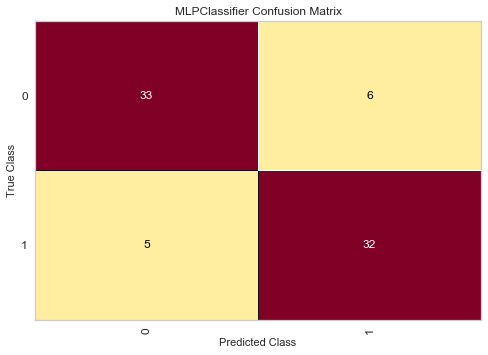

In [16]:
# The ConfusionMatrix visualizer uisng Yellowbrick library
cm = ConfusionMatrix(mlp, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

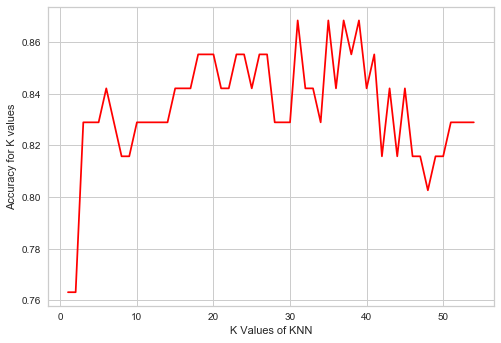

In [17]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for n in range(1,55):
    KNNfind = KNeighborsClassifier(n_neighbors = n)
    KNNfind.fit(x_train,y_train)
    scores.append(KNNfind.score(x_test,y_test))
    
plt.plot(range(1,55),scores,color="red")
plt.xlabel("K Values of KNN")
plt.ylabel("Accuracy for K values")
plt.show()

In [18]:
KNN = KNeighborsClassifier(n_neighbors = 41) 
KNN=KNN.fit(x_train, y_train)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(KNN, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_knn = KNN.predict(x_test)
print("Accuracy Score of the KNN classifier: ", accuracy_score(y_test, y_pred_knn))

Mean Accuracy of Cross Validation: % 81.92
Std of Accuracy of Cross Validation: % 4.0
Accuracy Score of the KNN classifier:  0.8552631578947368


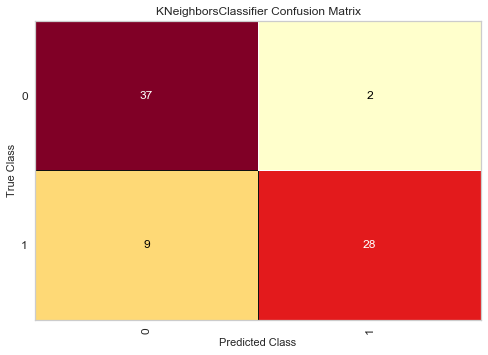

In [19]:
# The ConfusionMatrix visualizer 
cm = ConfusionMatrix(KNN, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [20]:
SVM = SVC()
SVM=SVM.fit(x_train, y_train)
y_pred_svm = SVM.predict(x_test)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(SVM, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_svm = SVM.predict(x_test)
print("Accuracy Score of the SVM classifier: ", accuracy_score(y_test, y_pred_svm))

Mean Accuracy of Cross Validation: % 80.12
Std of Accuracy of Cross Validation: % 8.0
Accuracy Score of the SVM classifier:  0.881578947368421


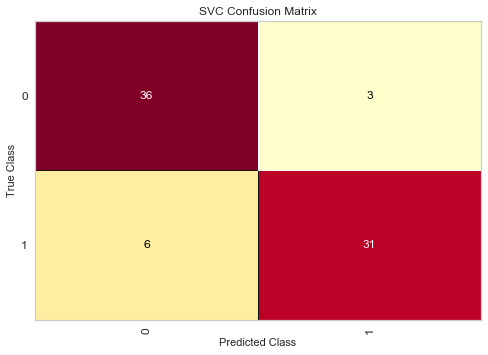

In [21]:
cm = ConfusionMatrix(SVM, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT=DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(DT, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_dt = DT.predict(x_test)
print("Accuracy Score of the DT classifier: ", accuracy_score(y_test, y_pred_dt))

Mean Accuracy of Cross Validation: % 76.11
Std of Accuracy of Cross Validation: % 8.0
Accuracy Score of the DT classifier:  0.7105263157894737


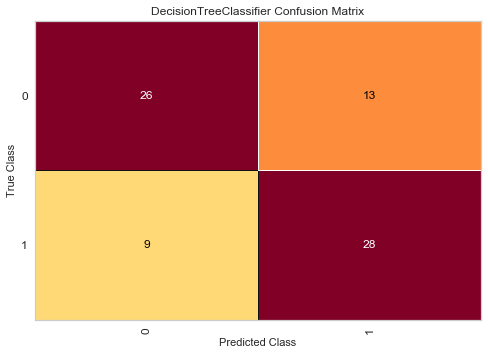

In [23]:
cm = ConfusionMatrix(DT, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

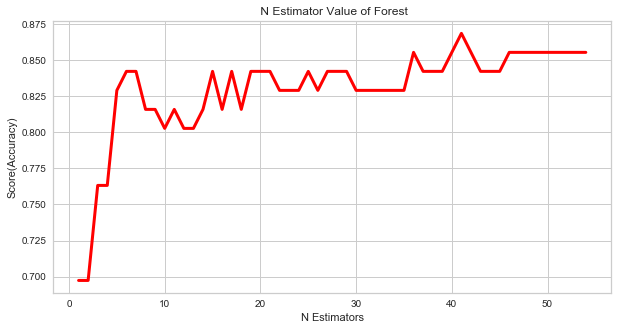

In [24]:
from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,55):
    RF = RandomForestClassifier(n_estimators = each,random_state=5)
    RF.fit(x_train,y_train)
    scores.append(RF.score(x_test, y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,55),scores,color="red",linewidth=3)
plt.title(" N Estimator Value of Forest")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [25]:
RF= RandomForestClassifier(n_estimators = 42) 
RF=RF.fit(x_train, y_train)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(RF, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_rf = RF.predict(x_test)
print("Accuracy Score of the DT classifier: ", accuracy_score(y_test, y_pred_rf))

Mean Accuracy of Cross Validation: % 78.42
Std of Accuracy of Cross Validation: % 7.0
Accuracy Score of the DT classifier:  0.868421052631579


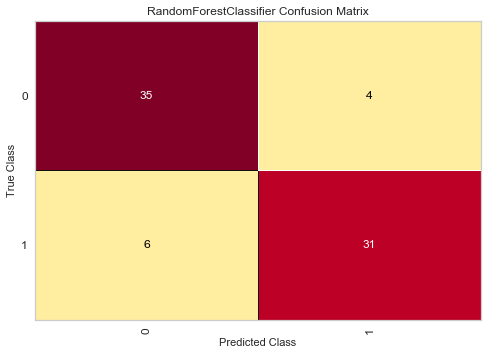

In [26]:
cm = ConfusionMatrix(RF, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [27]:
# Lets Train XGboost
xg = XGBClassifier()
xg=xg.fit(x_train, y_train)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(xg, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_xg = xg.predict(x_test)
print("Accuracy Score of the XGB classifier: ", accuracy_score(y_test, y_pred_xg))

Mean Accuracy of Cross Validation: % 78.81
Std of Accuracy of Cross Validation: % 6.0
Accuracy Score of the XGB classifier:  0.8421052631578947


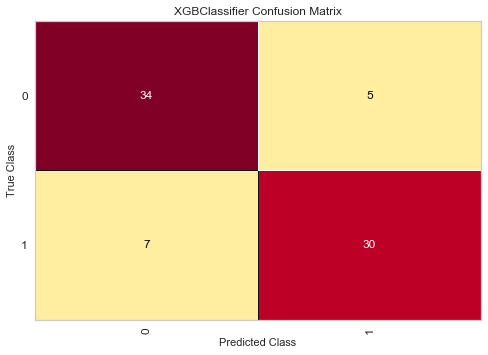

In [28]:
cm = ConfusionMatrix(xg, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [29]:
gnb=GaussianNB()
gnb=gnb.fit(x_train, y_train)
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(gnb, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
y_pred_gnb = gnb.predict(x_test)
print("Accuracy Score of the NB classifier: ", accuracy_score(y_test, y_pred_gnb))

Mean Accuracy of Cross Validation: % 82.31
Std of Accuracy of Cross Validation: % 6.0
Accuracy Score of the NB classifier:  0.8289473684210527


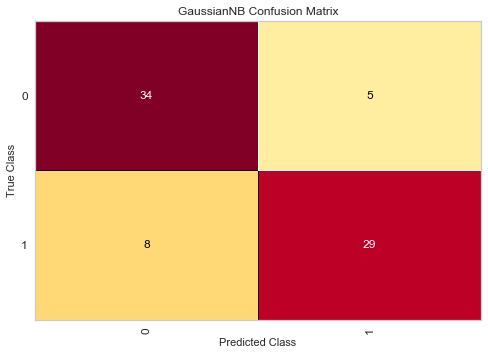

In [30]:
cm = ConfusionMatrix(gnb, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

Majority of the models used in provided accuracy around 85% except decision tree. Here we are trying to improvise the score of SVM and MLP model by tunning the hyperparameters.

In [31]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_
print("Best Parameters for SVM: ", grid_svc.best_estimator_)
print("Best Score for SVM: ", grid_svc.best_score_)

from sklearn.model_selection import cross_val_score
# 0.21% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(grid_svc, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))

Best Parameters for SVM:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score for SVM:  0.841352657004831
Mean Accuracy of Cross Validation: % 81.5
Std of Accuracy of Cross Validation: % 6.0


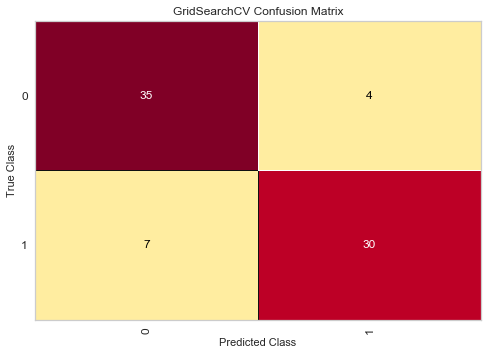

In [32]:
cm = ConfusionMatrix(grid_svc, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [33]:
mlp_params = {'alpha':[0.0001], 'activation': ['relu', 'tanh',], 
              'solver':['lbfgs', 'adam'], 'hidden_layer_sizes': [(100,14,7)], 
              'learning_rate':['adaptive']}
              
              
grid_mlp = GridSearchCV(MLPClassifier(), mlp_params)
grid_mlp.fit(x_train, y_train)
              
# MLP best estimator
mlp_new = grid_mlp.best_estimator_
print("Best Parameters for MLP: ", grid_mlp.best_estimator_)
print("Best Score for MLP: ", grid_mlp.best_score_)

from sklearn.model_selection import cross_val_score
# 0.28% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.21, random_state=42)
scores = cross_val_score(grid_mlp, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))

Best Parameters for MLP:  MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 14, 7), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Best Score for MLP:  0.8019323671497585
Mean Accuracy of Cross Validation: % 80.55
Std of Accuracy of Cross Validation: % 7.0


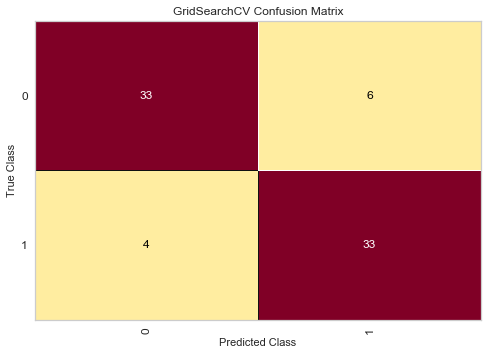

In [34]:
cm = ConfusionMatrix(grid_mlp, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

Various models are trained with their default parameters for heart disease data set out all two (SVM, MLP) are considered further hyper paramter tunning to achive the best parameters.Finally GaussianNB has choosen as this model has no problem of underfitting and overfitting and perfomed better as compared to other models. Other models are suffering with the probelm of overfitting. Tunned MLP model is also not having problem of overfitting and underfitting. 

In [35]:
# Create the submission file using naive_bayes GaussianNB and submit the file.
preds = pd.DataFrame(y_pred_gnb, columns=['GNB_predHeart'])
preds.to_csv('HeartDeseasePrediction_submission.csv')